In [32]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
import itertools
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

In [33]:
infile = open('../01_prognosemodell/06_newtry/fairness_ready.pkl','rb')
df = pickle.load(infile)
infile.close()

In [34]:
df_corr = df[['UserID_y','AbiEltern','eigSprache','Sex__m', 'Sex__w','Buecher', 'Erstloesung','Schussel','Erfolg', 'Schwierigkeit', 'ist_Schulzeit', 'MehrfachFalsch', 'vorher_abgebrochen','Fehler', 'Klassenstufe', 'Jahredabei', 'AnzahlAufgaben','Testposition__pruefung', 'Testposition__training','Testposition__version', 'Art__GK', 'Art__GR', 'Art__GZ', 'Art__K', 'Art__LB','UserAttribut', 'OrderNumber', 'steps']]
df_corr = df_corr.drop_duplicates()
df_corr = df_corr.drop(columns=['UserID_y'])
df_corr['AbiEltern'] = np.where((df_corr.AbiEltern == '2'),'1',df_corr.AbiEltern)
df_corr.AbiEltern = df_corr.AbiEltern.astype('float')
df_corr.Buecher = df_corr.Buecher.astype('float')

c = df_corr.corr(method='pearson')


In [35]:
#High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation. 
# Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation. 
# Low degree: When the value lies below + . 29, then it is said to be a small correlation.


In [36]:
c

,AbiEltern,eigSprache,Sex__m,Sex__w,Buecher,Erstloesung,Schussel,Erfolg,Schwierigkeit,ist_Schulzeit,...,Testposition__pruefung,Testposition__training,Testposition__version,Art__GK,Art__GR,Art__GZ,Art__K,Art__LB,UserAttribut,steps
AbiEltern,1.000000,0.005225,0.096056,-0.085794,0.277340,0.033949,-0.000349,0.019145,-0.010075,0.025701,...,-0.020112,0.034335,-0.020625,-0.017727,0.021535,0.022720,-0.000877,-0.003130,-0.012653,-0.026869
eigSprache,0.005225,1.000000,0.004066,0.000546,0.224260,0.030161,-0.003838,0.021019,0.006278,0.059940,...,-0.017729,0.031630,-0.019409,0.008689,-0.035696,-0.007458,0.010093,0.001517,0.006070,-0.018651
Sex__m,0.096056,0.004066,1.000000,-0.942634,0.013446,-0.030939,0.007675,-0.018284,-0.021882,0.036583,...,0.017296,-0.030847,0.018924,0.015070,0.014519,-0.047516,-0.049956,0.055310,0.012630,0.016485
Sex__w,-0.085794,0.000546,-0.942634,1.000000,-0.007130,0.027117,-0.006319,0.015821,0.019342,-0.025721,...,-0.015282,0.026768,-0.016196,-0.017844,-0.017276,0.053434,0.037074,-0.041856,-0.014672,-0.014273
Buecher,0.277340,0.224260,0.013446,-0.007130,1.000000,0.047250,-0.003979,0.030073,0.016010,0.019270,...,-0.028381,0.048607,-0.029010,0.014390,-0.030234,-0.001231,0.027214,-0.029342,0.021564,-0.030643
Erstloesung,0.033949,0.030161,-0.030939,0.027117,0.047250,1.000000,0.012394,-0.140987,-0.293832,0.000044,...,-0.561548,0.465683,-0.037649,-0.142265,0.031331,0.018276,0.073993,0.066084,-0.003872,-0.379810
Schussel,-0.000349,-0.003838,0.007675,-0.006319,-0.003979,0.012394,1.000000,-0.029172,0.010393,0.003665,...,-0.007362,0.007109,-0.001574,-0.026395,-0.000916,0.024190,-0.019170,0.034590,0.000290,-0.000994
Erfolg,0.019145,0.021019,-0.018284,0.015821,0.030073,-0.140987,-0.029172,1.000000,-0.180314,0.000232,...,0.046702,-0.016684,-0.020599,-0.075352,0.016950,0.000539,0.041374,0.038527,-0.001662,-0.010829
Schwierigkeit,-0.010075,0.006278,-0.021882,0.019342,0.016010,-0.293832,0.010393,-0.180314,1.000000,-0.011909,...,0.181440,-0.258054,0.127970,-0.038993,0.053644,0.023009,-0.083407,0.087687,-0.002716,0.253773
ist_Schulzeit,0.025701,0.059940,0.036583,-0.025721,0.019270,0.000044,0.003665,0.000232,-0.011909,1.000000,...,-0.000199,-0.000736,0.000956,0.006577,0.000093,-0.009451,-0.010339,0.008550,0.000273,0.001836


In [37]:
writer = pd.ExcelWriter('correlations.xlsx', engine='xlsxwriter')
c.to_excel(writer, sheet_name='corr')
writer.save()

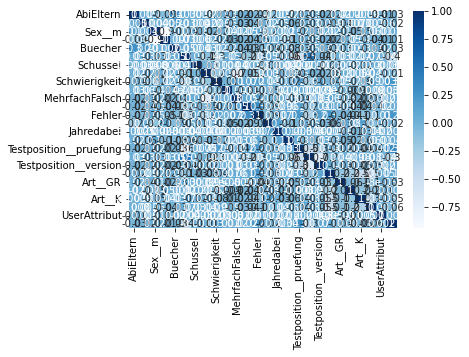

In [38]:
heatmap = sns.heatmap(c, annot=True, cmap="Blues", fmt='.1g')